<a href="https://colab.research.google.com/github/ppza53893/Bulk_Tensor_Convert/blob/main/BFO_Bulk_Tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BiFeO3の(111)方向のバルク光起電力のテンソル導出を行います。
セルはctrl + Enterで実行可能です
$$
\newcommand{\vect}[1]{\boldsymbol{#1}} \\
$$

In [ ]:
# 必要なモジュールをインポート
import sympy
from sympy import Symbol, Matrix
from sympy import sin, cos, acos, sqrt, pi

sympy.init_printing()

まずは$\vect{\beta}_{\rm ijk}$成分を定義しておきます。$3\times3\times3=27$個です。

ただ、全部定義するものアレなので、要素を減らしていきます。  
まず、$\rm j, k$成分は光電界$\vect{e}$の偏微分の分母が交換可能であることを利用します。これで27個から18個まで減らせます。

In [ ]:
b111 = Symbol('β_111')
b112 = Symbol('β_112')
b113 = Symbol('β_113')
# b121 = Symbol('β_121') = b121
b122 = Symbol('β_122')
b123 = Symbol('β_123')
# b131 = Symbol('β_131') = b113
# b132 = Symbol('β_132') = b123
b133 = Symbol('β_133')
b211 = Symbol('β_211')
b212 = Symbol('β_212')
b213 = Symbol('β_213')
# b221 = Symbol('β_221') = b212
b222 = Symbol('β_222')
b223 = Symbol('β_223')
# b231 = Symbol('β_231') = b213
# b232 = Symbol('β_232') = b223
b233 = Symbol('β_233')
b311 = Symbol('β_311')
b312 = Symbol('β_312')
b313 = Symbol('β_313')
# b321 = Symbol('β_321') = b312
b322 = Symbol('β_322')
b323 = Symbol('β_323')
# b331 = Symbol('β_331') = b313
# b332 = Symbol('β_332') = b323
b333 = Symbol('β_333')

ここで$\vect{\beta}_{ijk}$を次のように表現します。卒論とかではこういう表現です:

$$
    \left [ 
        \matrix{
            \beta_{111}& \beta_{122}& \beta_{133}& \beta_{123}& \beta_{113}& \beta_{112} \\
            \beta_{211}& \beta_{222}& \beta_{233}& \beta_{223}& \beta_{213}& \beta_{212} \\
            \beta_{311}& \beta_{322}& \beta_{333}& \beta_{323}& \beta_{313}& \beta_{312} \\
            }
    \right ] \tag{1}
$$

プログラミングを使って計算する場合、ちょっとこれはやりづらいので、次のように表現します。

$$
    \left [
        \matrix{
            \vect{\beta}_{\rm 11k} & \vect{\beta}_{\rm 12k} & \vect{\beta}_{\rm 13k} \\
            \vect{\beta}_{\rm 21k} & \vect{\beta}_{\rm 22k} & \vect{\beta}_{\rm 23k} \\
            \vect{\beta}_{\rm 31k} & \vect{\beta}_{\rm 32k} & \vect{\beta}_{\rm 33k} \\
        }
    \right ]
$$
各要素は3つの成分をもつ3行1列の行列です。例えば
$$
    \vect{\beta}_{\rm 11k} = \left [
        \matrix{
            \beta_{\rm 111} & \beta_{\rm 112} & \beta_{\rm 113}
            }
    \right ]
$$

In [ ]:
Beta = Matrix([
    [[b111, b112, b113],[b112, b122, b123],[b113, b123, b133]],
    [[b211, b212, b213],[b212, b222, b223],[b213, b223, b233]],
    [[b311, b312, b313],[b312, b322, b323],[b313, b323, b333]]
    ])
Beta

⎡[β₁₁₁, β₁₁₂, β₁₁₃]  [β₁₁₂, β₁₂₂, β₁₂₃]  [β₁₁₃, β₁₂₃, β₁₃₃]⎤
⎢                                                          ⎥
⎢[β₂₁₁, β₂₁₂, β₂₁₃]  [β₂₁₂, β₂₂₂, β₂₂₃]  [β₂₁₃, β₂₂₃, β₂₃₃]⎥
⎢                                                          ⎥
⎣[β₃₁₁, β₃₁₂, β₃₁₃]  [β₃₁₂, β₃₂₂, β₃₂₃]  [β₃₁₃, β₃₂₃, β₃₃₃]⎦

$\vect{\beta}$の要素はさらに減らすことができます。点群の対称操作によって座標系を$(\rm i,j,k)$から$(\rm l,m,n)$に変換する式は次のようになります:
$$
\vect{\beta}_{\rm lmn} = \vect{T}_{\rm il}\vect{T}_{\rm jm}\vect{T}_{\rm kn}\vect{\beta}_{\rm lmn} \tag{2}
$$

まず、BiFeO3は3mに属するので、3つの鏡映面をとります。軸の位置については僕の卒論とか林本さんの修論を見ていただければと思いますが、それぞれを$\vect{u}, \vect{v}, \vect{u}+\vect{v}$とします。

まず、$\vect{u}+\vect{v}$の鏡映操作を考えます。これはyz平面に対する鏡映操作になるので、得られる$\vect{T}$は、
$$
    \vect{T}_{\rm ij} = \left [
        \matrix{
            -1&0&0 \\
            0&1&0 \\
            0&0&1
        }
    \right ] \tag{3}
$$
となります。式(3)は対角成分しか持たないのですから、$\beta$の各成分は次のように表現できるはずです。
$$
\beta_{\rm lmn} = T_{\rm ll}T_{\rm mm}T_{\rm nn}\beta_{\rm ijk}\tag{4}
$$
$\rm l, m, n$の中で1になる要素が奇数個あれば$T_{11}$の要素が1または3個含まれることになるので$\beta_{\rm lmn}=-\beta_{\rm lmn}$、偶数個の時は$\beta_{\rm lmn}=\beta_{\rm lmn}$になります。さらに奇数個の場合は変形して$\beta_{\rm lmn}=0$になるので、鏡映操作でもかなり減らせるようになります。

実際に計算してみましょう。

In [ ]:
T_mirror = Matrix([[-1, 0, 0], [0, 1 ,0], [0, 0, 1]])
T_mirror

⎡-1  0  0⎤
⎢        ⎥
⎢0   1  0⎥
⎢        ⎥
⎣0   0  1⎦

式3の$\vect{T}$を(2)の$\vect{T}$に代入します。式計算は次の関数で可能です:

In [ ]:
def newvalue(r, s, t, Beta, transTensor):
    tmp = 0
    for i in range(3):
        for j in range(3):
            for k in range(3):
                tmp += transTensor[r,i]*transTensor[s,j]*transTensor[t,k]*Beta[i,j][k]
    return tmp

def calculate_tensor(beta, tensor):
    """
    参考
    http://save.sys.t.u-tokyo.ac.jp/~kawai/basic/node214.html
    """
    Beta_new= Matrix([
        [[0,0,0],[0,0,0],[0,0,0]],
        [[0,0,0],[0,0,0],[0,0,0]],
        [[0,0,0],[0,0,0],[0,0,0]]
        ])

    for r in range(3):
        for s in range(3):
            for t in range(3):
                Beta_new[r, s][t] = newvalue(r, s, t, beta, tensor)
    
    return Beta_new

In [ ]:
Beta_new = calculate_tensor(Beta, T_mirror)
Beta_new

⎡[-β₁₁₁, β₁₁₂, β₁₁₃]   [β₁₁₂, -β₁₂₂, -β₁₂₃]  [β₁₁₃, -β₁₂₃, -β₁₃₃]⎤
⎢                                                                ⎥
⎢[β₂₁₁, -β₂₁₂, -β₂₁₃]  [-β₂₁₂, β₂₂₂, β₂₂₃]   [-β₂₁₃, β₂₂₃, β₂₃₃] ⎥
⎢                                                                ⎥
⎣[β₃₁₁, -β₃₁₂, -β₃₁₃]  [-β₃₁₂, β₃₂₂, β₃₂₃]   [-β₃₁₃, β₃₂₃, β₃₃₃] ⎦

上の結果の中で負になる要素は全て0になります。したがって

$\beta_{111}=\beta_{122}=\beta_{123}=\beta_{133}=\beta_{212}=\beta_{213}=\beta_{312}=\beta_{313}=0 \tag{5} $

となるわけです。したがって、この時点で

$$
    \left [ 
        \matrix{
            0& 0& 0& 0& \beta_{113}& \beta_{112} \\
            \beta_{211}& \beta_{222}& \beta_{233}& \beta_{223}& 0& 0 \\
            \beta_{311}& \beta_{322}& \beta_{333}& \beta_{323}& 0& 0 \\
            }
    \right ] \tag{6}
$$
となっています。

In [ ]:
Beta_6 = Matrix([
    [[0, b112, b113],[b112, 0, 0],[b113, 0, 0]],
    [[b211, 0, 0],[0, b222, b223],[0, b223, b233]],
    [[b311, 0, 0],[0, b322, b323],[0, b323, b333]]
    ])
Beta_6

⎡[0, β₁₁₂, β₁₁₃]   [β₁₁₂, 0, 0]     [β₁₁₃, 0, 0]  ⎤
⎢                                                 ⎥
⎢ [β₂₁₁, 0, 0]    [0, β₂₂₂, β₂₂₃]  [0, β₂₂₃, β₂₃₃]⎥
⎢                                                 ⎥
⎣ [β₃₁₁, 0, 0]    [0, β₃₂₂, β₃₂₃]  [0, β₃₂₃, β₃₃₃]⎦

次に$\vect{u}, \vect{v}$の鏡映操作を考えましょう。$x$軸とのなす角が$\theta$の直線に対する鏡映操作の変換行列は、$x$軸から$2\theta$だけ回転させたときの座標変換行列に等しいです。つまり、
$$
    \vect{T}_{\rm ij} = \left [
        \matrix{
            \cos{2\theta}&-\sin{2\theta}&0 \\
            \sin{2\theta}&\cos{2\theta}&0 \\
            0&0&1
        }
    \right ] \tag{7}
$$
となります。$\vect{u}$軸は$\theta=30^\circ$なので、
$$
    \vect{T}_{\rm ij} = \left [
        \matrix{
            \frac{1}{2}&-\frac{\sqrt{3}}{2}&0 \\
            \frac{\sqrt{3}}{2}&\frac{1}{2}&0 \\
            0&0&1
        }
    \right ] \tag{8}
$$
$\vect{v}$軸は$\theta=150^\circ$なので、
$$
    \vect{T}_{\rm ij} = \left [
        \matrix{
            -\frac{1}{2}&-\frac{\sqrt{3}}{2}&0 \\
            \frac{\sqrt{3}}{2}&-\frac{1}{2}&0 \\
            0&0&1
        }
    \right ] \tag{9}
$$
です。BiFeO3は3回回転軸をもつので、さらに$\theta=-120^\circ$についても考えると、
$$
    \vect{T}_{\rm ij} = \left [
        \matrix{
            -\frac{1}{2}&\frac{\sqrt{3}}{2}&0 \\
            -\frac{\sqrt{3}}{2}&-\frac{1}{2}&0 \\
            0&0&1
        }
    \right ] \tag{10}
$$
となります。式(7)~(9)を(6)に実際に代入してみましょう。


In [ ]:
def trans_tensor(theta):
    return Matrix([[cos(2*theta),-sin(2*theta),0],[sin(2*theta),cos(2*theta),0],[0,0,1]])

In [ ]:
trans_tensor(Symbol('θ'))

⎡cos(2⋅θ)  -sin(2⋅θ)  0⎤
⎢                      ⎥
⎢sin(2⋅θ)  cos(2⋅θ)   0⎥
⎢                      ⎥
⎣   0          0      1⎦

In [ ]:
T_u = trans_tensor(pi/6)
T_u

⎡     -√3    ⎤
⎢1/2  ────  0⎥
⎢      2     ⎥
⎢            ⎥
⎢√3          ⎥
⎢──   1/2   0⎥
⎢2           ⎥
⎢            ⎥
⎣ 0    0    1⎦

In [ ]:
T_v = trans_tensor(5*pi/6)
T_v

⎡      √3    ⎤
⎢1/2   ──   0⎥
⎢      2     ⎥
⎢            ⎥
⎢-√3         ⎥
⎢────  1/2  0⎥
⎢ 2          ⎥
⎢            ⎥
⎣ 0     0   1⎦

In [ ]:
T_3 = trans_tensor(-2*pi/3)
T_3

⎡      -√3    ⎤
⎢-1/2  ────  0⎥
⎢       2     ⎥
⎢             ⎥
⎢ √3          ⎥
⎢ ──   -1/2  0⎥
⎢ 2           ⎥
⎢             ⎥
⎣ 0     0    1⎦

In [ ]:
Beta_u = calculate_tensor(Beta_6, T_u)
Beta_v = calculate_tensor(Beta_6, T_v)
Beta_3 = calculate_tensor(Beta_6, T_3)

In [ ]:
Beta_u

⎡ ⎡  √3⋅β₁₁₂   √3⋅β₂₁₁   3⋅√3⋅β₂₂₂    β₁₁₂   3⋅β₂₁₁   3⋅β₂₂₂  β₁₁₃   3⋅β₂₂₃⎤  
⎢ ⎢- ─────── - ─────── - ─────────, - ──── - ────── + ──────, ──── + ──────⎥  
⎢ ⎣     4         8          8         4       8        8      4       4   ⎦  
⎢                                                                             
⎢⎡  3⋅β₁₁₂   β₂₁₁   3⋅β₂₂₂    √3⋅β₁₁₂   √3⋅β₂₁₁   √3⋅β₂₂₂  √3⋅β₁₁₃   √3⋅β₂₂₃⎤ 
⎢⎢- ────── + ──── + ──────, - ─────── + ─────── - ───────, ─────── - ───────⎥ 
⎢⎣    4       8       8          4         8         8        4         4   ⎦ 
⎢                                                                             
⎢               ⎡β₃₁₁   3⋅β₃₂₂  √3⋅β₃₁₁   √3⋅β₃₂₂  -√3⋅β₃₂₃ ⎤                 
⎢               ⎢──── + ──────, ─────── - ───────, ─────────⎥                 
⎣               ⎣ 4       4        4         4         2    ⎦                 

 ⎡  β₁₁₂   3⋅β₂₁₁   3⋅β₂₂₂  √3⋅β₁₁₂   3⋅√3⋅β₂₁₁   √3⋅β₂₂₂  √3⋅β₁₁₃   √3⋅β₂₂₃⎤ 
 ⎢- ──── - ────── + ──────, ─────── - ───────── - ─

In [ ]:
Beta_v

⎡  ⎡√3⋅β₁₁₂   √3⋅β₂₁₁   3⋅√3⋅β₂₂₂    β₁₁₂   3⋅β₂₁₁   3⋅β₂₂₂  β₁₁₃   3⋅β₂₂₃⎤   
⎢  ⎢─────── + ─────── + ─────────, - ──── - ────── + ──────, ──── + ──────⎥   
⎢  ⎣   4         8          8         4       8        8      4       4   ⎦   
⎢                                                                             
⎢⎡  3⋅β₁₁₂   β₂₁₁   3⋅β₂₂₂  √3⋅β₁₁₂   √3⋅β₂₁₁   √3⋅β₂₂₂    √3⋅β₁₁₃   √3⋅β₂₂₃⎤ 
⎢⎢- ────── + ──── + ──────, ─────── - ─────── + ───────, - ─────── + ───────⎥ 
⎢⎣    4       8       8        4         8         8          4         4   ⎦ 
⎢                                                                             
⎢               ⎡β₃₁₁   3⋅β₃₂₂    √3⋅β₃₁₁   √3⋅β₃₂₂  √3⋅β₃₂₃⎤                 
⎢               ⎢──── + ──────, - ─────── + ───────, ───────⎥                 
⎣               ⎣ 4       4          4         4        2   ⎦                 

 ⎡  β₁₁₂   3⋅β₂₁₁   3⋅β₂₂₂    √3⋅β₁₁₂   3⋅√3⋅β₂₁₁   √3⋅β₂₂₂    √3⋅β₁₁₃   √3⋅β₂
 ⎢- ──── - ────── + ──────, - ─────── + ───────── +

In [ ]:
Beta_3

⎡  ⎡  √3⋅β₁₁₂   √3⋅β₂₁₁   3⋅√3⋅β₂₂₂  β₁₁₂   3⋅β₂₁₁   3⋅β₂₂₂  β₁₁₃   3⋅β₂₂₃⎤   
⎢  ⎢- ─────── - ─────── - ─────────, ──── + ────── - ──────, ──── + ──────⎥   
⎢  ⎣     4         8          8       4       8        8      4       4   ⎦   
⎢                                                                             
⎢⎡3⋅β₁₁₂   β₂₁₁   3⋅β₂₂₂    √3⋅β₁₁₂   √3⋅β₂₁₁   √3⋅β₂₂₂    √3⋅β₁₁₃   √3⋅β₂₂₃⎤ 
⎢⎢────── - ──── - ──────, - ─────── + ─────── - ───────, - ─────── + ───────⎥ 
⎢⎣  4       8       8          4         8         8          4         4   ⎦ 
⎢                                                                             
⎢              ⎡β₃₁₁   3⋅β₃₂₂    √3⋅β₃₁₁   √3⋅β₃₂₂  -√3⋅β₃₂₃ ⎤                
⎢              ⎢──── + ──────, - ─────── + ───────, ─────────⎥                
⎣              ⎣ 4       4          4         4         2    ⎦                

 ⎡β₁₁₂   3⋅β₂₁₁   3⋅β₂₂₂  √3⋅β₁₁₂   3⋅√3⋅β₂₁₁   √3⋅β₂₂₂    √3⋅β₁₁₃   √3⋅β₂₂₃⎤ 
 ⎢──── + ────── - ──────, ─────── - ───────── - ───

結果が複雑ですが、式(7)~(9)を代入した結果と式(6)が等しいことを考えれば、どの場合においても、次が成り立ちます。$\rm j, k$成分を取り換えても同じです。
$$
\beta_{113} = \beta_{123} = \beta_{223}\\
\beta_{112} = \beta_{211} = -\beta_{222} \\
\beta_{311} = \beta_{322} \\
\beta_{233} = \beta_{323} = \beta_{332} = 0
$$

$\beta_{333}$については他の成分についての関係はありません。したがって、BiFeO3の(111)配向での$\vect{\beta}$成分というのは、

$$
    \left [ 
        \matrix{
            0& 0& 0& 0& \beta_{113}& \beta_{222} \\
            -\beta_{222}& \beta_{222}& 0& \beta_{223}& 0& 0 \\
            \beta_{311}& \beta_{311}& \beta_{333}& 0& 0& 0 \\
            }
    \right ] \tag{11}
$$

になります。

In [ ]:
Beta_111 = Matrix([
    [[0, -b222, b113],[-b222, 0, 0],[b113, 0, 0]],
    [[-b222, 0, 0],[0, b222, b223],[0, b223, 0]],
    [[b311, 0, 0],[0, b311, 0],[0, 0, b333]]
    ])
Beta_111

⎡[0, -β₂₂₂, β₁₁₃]   [-β₂₂₂, 0, 0]   [β₁₁₃, 0, 0]⎤
⎢                                               ⎥
⎢ [-β₂₂₂, 0, 0]    [0, β₂₂₂, β₂₂₃]  [0, β₂₂₃, 0]⎥
⎢                                               ⎥
⎣  [β₃₁₁, 0, 0]     [0, β₃₁₁, 0]    [0, 0, β₃₃₃]⎦

## おまけ
今後やる人がいるのかはわかりませんが、STO(001)基板上に成膜させたBFOは配向が(001)になります。(111)から変えていましょう。

配向を変える場合は、$\vect{T}$は次のようになります。
$$
    \vect{T}_{\rm ij} = \left [
        \matrix{
            1&0&0 \\
            0& \cos{\theta}&\sin{\theta} \\
            0&-\sin{\theta}&\cos{\theta}
        }
    \right ] \tag{12}
$$
軸関係を考えると、この$\theta$に$\cos^{-1} \frac{1}{\sqrt{3}} $を代入すればいいわけで、
$$
    \vect{T}_{\rm ij} = \left [
        \matrix{
            1&0&0 \\
            0& \frac{1}{\sqrt{3}}&-\frac{\sqrt{6}}{3}\\
            0&\frac{\sqrt{6}}{3}&\frac{1}{\sqrt{3}}
        }
    \right ] \tag{13}
$$
となります。式(11)と(13)を式(2)に代入します。

In [ ]:
theta = acos(1/sqrt(3)) # or Symbol("θ")
T_001 = Matrix([[1,0,0], [0,cos(theta), sin(theta)], [0,-sin(theta), cos(theta)]])
Beta_001 = calculate_tensor(Beta_111, T_001)
Beta_001

⎡⎡   √6⋅β₁₁₃   √3⋅β₂₂₂  √3⋅β₁₁₃   √6⋅β₂₂₂⎤                                   ⎡
⎢⎢0, ─────── - ───────, ─────── + ───────⎥                                   ⎢
⎢⎣      3         3        3         3   ⎦                                   ⎣
⎢                                                                             
⎢       ⎡  √3⋅β₂₂₂   √6⋅β₃₁₁      ⎤         ⎡   √3⋅β₂₂₂   2⋅√6⋅β₂₂₃   √6⋅β₃₁₁ 
⎢       ⎢- ─────── + ───────, 0, 0⎥         ⎢0, ─────── + ───────── + ─────── 
⎢       ⎣     3         3         ⎦         ⎣      9          9          9    
⎢                                                                             
⎢        ⎡√6⋅β₂₂₂   √3⋅β₃₁₁      ⎤           ⎡     √6⋅β₂₂₂   4⋅√3⋅β₂₂₃   √3⋅β₃
⎢        ⎢─────── + ───────, 0, 0⎥           ⎢0, - ─────── - ───────── + ─────
⎣        ⎣   3         3         ⎦           ⎣        9          9          9 

√6⋅β₁₁₃   √3⋅β₂₂₂      ⎤                                                      
─────── - ───────, 0, 0⎥                           

光を照射した際の電流密度$J_{<110>_{pc}}$における$\vect{\beta}^{'(001)}_{xxy}$は次の通りです

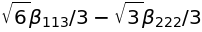

In [ ]:
Beta_001[0,0][1]